# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

## Getting the data

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-01-19 01:39:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  54.4MB/s    in 1.9s    

2023-01-19 01:39:17 (54.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [3]:
import os

In [4]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} \
    images in '{dirpath}'.")

There are 2 directories and 0     images in 'pizza_steak'.
There are 2 directories and 0     images in 'pizza_steak/test'.
There are 0 directories and 250     images in 'pizza_steak/test/steak'.
There are 0 directories and 250     images in 'pizza_steak/test/pizza'.
There are 2 directories and 0     images in 'pizza_steak/train'.
There are 0 directories and 750     images in 'pizza_steak/train/steak'.
There are 0 directories and 750     images in 'pizza_steak/train/pizza'.


In [5]:
# Another way to find out how many images are in a file
len(os.listdir('pizza_steak/train/steak'))

750

In [6]:
import pathlib
import numpy as np

In [7]:
# Getting the classnames
data_dir = pathlib.Path('pizza_steak/train')
# Create a list of calss_names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [9]:
# Visualize an image
def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class

    # Get a random image path (get one item inside the folder)
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image Shape: {img.shape}')

    return img

Image Shape: (512, 382, 3)


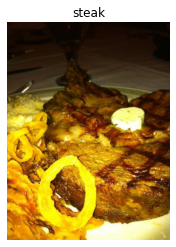

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [11]:
import tensorflow as tf

In [12]:
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 22,   8,   0],
        [ 25,   8,   0],
        [ 27,  10,   2],
        ...,
        [ 12,   9,   0],
        [ 10,  10,   0],
        [  9,  11,   0]],

       [[ 21,   7,   0],
        [ 24,   7,   0],
        [ 25,   8,   0],
        ...,
        [ 11,   8,   0],
        [  9,   9,   0],
        [  9,   9,   0]],

       [[ 21,   7,   0],
        [ 24,   7,   0],
        [ 25,   8,   0],
        ...,
        [ 12,   8,   0],
        [ 11,   8,   0],
        [ 11,   8,   0]],

       ...,

       [[197, 122,   7],
        [197, 122,   7],
        [197, 120,   6],
        ...,
        [170, 158,  72],
        [170, 160,  73],
        [168, 160,  75]],

       [[193, 119,   0],
        [195, 121,   0],
        [198, 122,   2],
        ...,
        [172, 160,  74],
        [172, 162,  77],
        [170, 162,  77]],

       [[190, 117,   0],
        [193, 120,   0],
        [196, 121,   0],
        ...,
        [172, 162,  7

In [13]:
# Returns width, height and colour channels
img.shape

(512, 382, 3)

In [14]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.08627451, 0.03137255, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        [0.10588235, 0.03921569, 0.00784314],
        ...,
        [0.04705882, 0.03529412, 0.        ],
        [0.03921569, 0.03921569, 0.        ],
        [0.03529412, 0.04313725, 0.        ]],

       [[0.08235294, 0.02745098, 0.        ],
        [0.09411765, 0.02745098, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        ...,
        [0.04313725, 0.03137255, 0.        ],
        [0.03529412, 0.03529412, 0.        ],
        [0.03529412, 0.03529412, 0.        ]],

       [[0.08235294, 0.02745098, 0.        ],
        [0.09411765, 0.02745098, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        ...,
        [0.04705882, 0.03137255, 0.        ],
        [0.04313725, 0.03137255, 0.        ],
        [0.04313725, 0.03137255, 0.        ]],

       ...,

       [[0.77254902, 0.47843137, 0.02745098],
        [0.77254902, 0.47843137, 0.02745098],
        [0.77254902, 0

## An End-to-end Example (CNN)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# Set random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1 (Normalization))
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directories (don't need '/content/')
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
# Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 213ms/step - loss: 0.5949 - accuracy: 0.6740 - val_loss: 0.4559 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4333 - accuracy: 0.8147 - val_loss: 0.3525 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3971 - accuracy: 0.8333 - val_loss: 0.3283 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3678 - accuracy: 0.8480 - val_loss: 0.3230 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3010 - accuracy: 0.8700 - val_loss: 0.2870 - val_accuracy: 0.8760


In [18]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

[https://poloclub.github.io/cnn-explainer/](htthttps://poloclub.github.io/cnn-explainer/ps://)

## Using a Non-convolutional Neural Network to Learn from Images

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 1.5975 - accuracy: 0.5113 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


```python
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
```

Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6880 - accuracy: 0.7327 - val_loss: 0.5331 - val_accuracy: 0.7800

- It results in almost 500x more params than the CNN



- A Convolutional Neural Network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters, these are often more helpful in dechipering between different features in an image.

## Binary Classification

1. Visualize the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model

### Visualize the Data

Image Shape: (512, 512, 3)
Image Shape: (384, 512, 3)


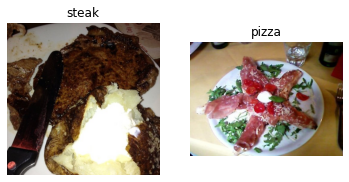

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess the Data

In [22]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

- **Bacthes**: Small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

1. 10,000 images might not fit into the memory of the processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [23]:
# Create train and test data generators and rescale the data
# (multiplying all pixels by 1/255)
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,        # Target directory
    target_size=(224, 224),     # Target size of images (height, width)
    class_mode='binary',        # Type of data
    batch_size=32)              # Size of minibatches
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Getting a sample of a train data batch
images, labels = train_data.next() # Get the "next" batch of images
len(images), len(labels)

(32, 32)

In [26]:
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### Create a CNN Model

In [27]:
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D 
from keras.layers import Activation, MaxPool2D
from keras import Sequential

In [28]:
model_3 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1,
           padding='valid', activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

|Hyperparameter Name|What does it do?|-|
|--|--|--|
|Filters|Decides how many filters should pass over an input tensor|Higher values lead to more complex models|
|Kernel Size|Determines the shape of the filters over the output|Lower values learn smaller features, higher values learn larger features|
|Padding|Pads the target tensor with zeros (if 'same') to preserve input shape. Leaves the target tensor as it is (if 'valid'), lowering output shape|-|
|Strides|The number of steps a filter takes across an image at a time|-|

In [29]:
# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### Fitting the Model

In [30]:
# Get a summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6879 - accuracy: 0.6933 - val_loss: 0.4543 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4317 - accuracy: 0.8113 - val_loss: 0.4033 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3072 - accuracy: 0.8800 - val_loss: 0.4316 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.1848 - accuracy: 0.9360 - val_loss: 0.4325 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.0878 - accuracy: 0.9773 - val_loss: 0.4238 - val_accuracy: 0.8120


### Evaluating the Model

In [33]:
import pandas as pd

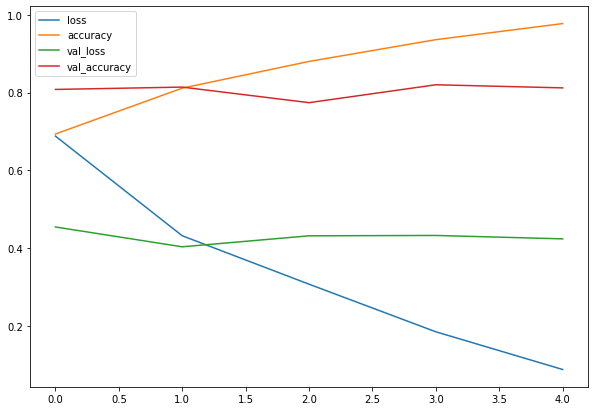

In [34]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))

In [35]:
# Plotthe validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs

    # Plot loss
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

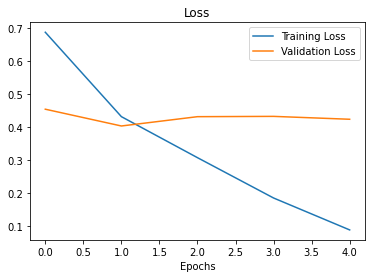

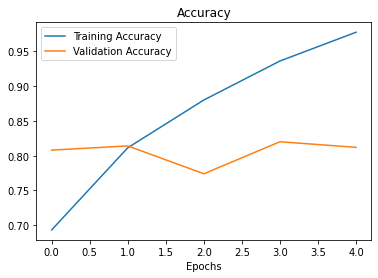

In [36]:
# Check the loss and accuracy of model_3
plot_loss_curves(history_3)

- When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset.

### Adjust the Model Parameters (Reducing Overfitting)

- **Reduce Overfitting:**
    - Add data augmentation
    - Add regularization layers (MaxPool)
    - Add more data

- Reducing overfitting is also known as regularization

In [37]:
# Create a model
model_4 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    # (2, 2) Layer, returns the maximum of the 2 by 2 shape
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the Model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.6280 - accuracy: 0.6347 - val_loss: 0.4915 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4693 - accuracy: 0.7813 - val_loss: 0.3850 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 16s 345ms/step - loss: 0.4199 - accuracy: 0.8087 - val_loss: 0.3717 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4012 - accuracy: 0.8280 - val_loss: 0.3354 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3904 - accuracy: 0.8240 - val_loss: 0.3352 - val_accuracy: 0.8540


In [40]:
# Get a summay
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

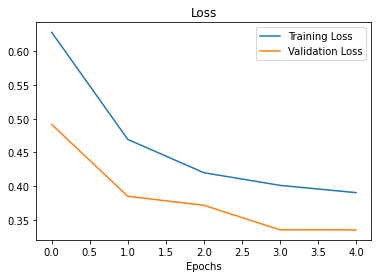

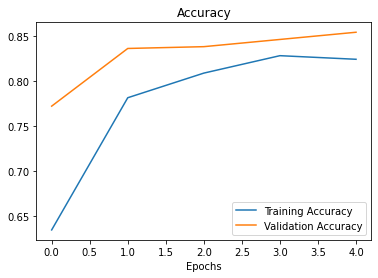

In [41]:
# Plot loss curves
plot_loss_curves(history_4)

### Data Augmentation

- Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the model to learn more generalizable patterns.

In [42]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [43]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=False)

# Create non-augmented train data batches
print('Non-Augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('Non-Augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 500 images belonging to 2 classes.


In [44]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next()

Showing image number: 22


(-0.5, 223.5, 223.5, -0.5)

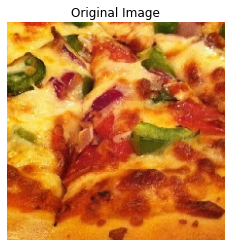

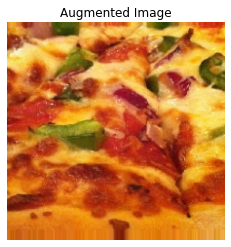

In [45]:
# Show the original image and the augmented image
random_number = random.randint(0, 32)
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False)

## Training on Augmented Data

In [46]:
# Create a model
model_5 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6988 - accuracy: 0.4887 - val_loss: 0.6874 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6881 - accuracy: 0.5360 - val_loss: 0.6631 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6440 - accuracy: 0.6693 - val_loss: 0.6803 - val_accuracy: 0.5320
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.7503 - accuracy: 0.5840 - val_loss: 0.6717 - val_accuracy: 0.5860
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6668 - accuracy: 0.5873 - val_loss: 0.6432 - val_accuracy: 0.6180


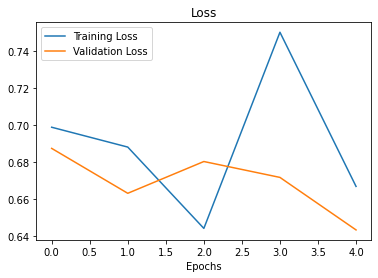

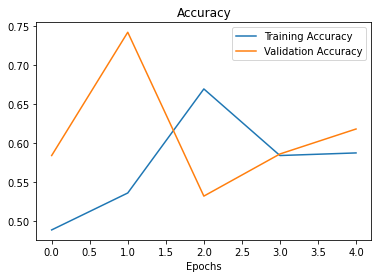

In [47]:
# Check the model's training curves
plot_loss_curves(history_5)

### Shuffling the Augmented Training Data

In [48]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [49]:
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6625 - accuracy: 0.5800 - val_loss: 0.5915 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5737 - accuracy: 0.7107 - val_loss: 0.4185 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.4952 - accuracy: 0.7707 - val_loss: 0.3643 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4647 - accuracy: 0.7887 - val_loss: 0.3304 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4456 - accuracy: 0.8073 - val_loss: 0.3953 - val_accuracy: 0.8220


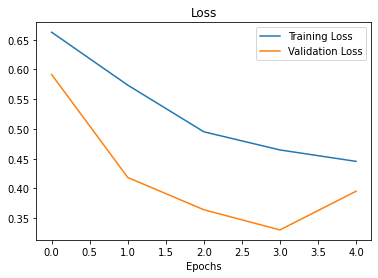

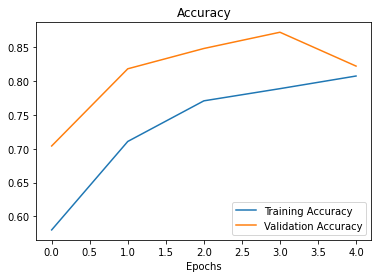

In [51]:
# Plot loss curves
plot_loss_curves(history_6)

- Why does Shuffling helps?
    - Without shuffling, the model will first see all the pizza images, and then the steak images

## Making a Prediction with the Trained Model

In [52]:
# View the example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-01-19 02:36:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-01-19 02:36:26 (55.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

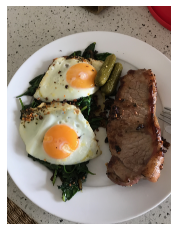

In [54]:
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [55]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

In [56]:
# Create a function to import an image and resize it to be able to
# be used with the model
def load_and_prep_image(filename, img_shape=224):
    """
    Read an image from filename, turns it into a tensor and reshapes it
    to (img_shape, img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img / 255.
    return img

In [57]:
# Load in and preprocess the custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [60]:
tf.expand_dims(steak, axis=0).shape

TensorShape([1, 224, 224, 3])

In [62]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.87517715]], dtype=float32)

In [61]:
# Remind the class_names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
# Indexing the predicted class by rounding the prediction
# probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [64]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 19ms/step


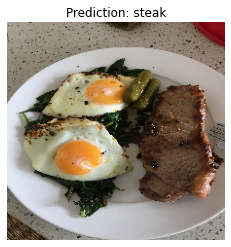

In [65]:
# Test the model on a custom image
pred_and_plot(model_6, '03-steak.jpeg')

--2023-01-19 03:02:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-01-19 03:02:05 (53.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 23ms/step


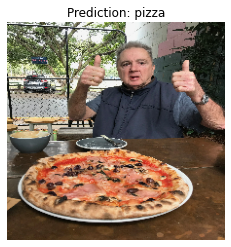

In [66]:
# Making another prediction
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, '03-pizza-dad.jpeg')

# Multiclass Image Classification

## Import and Analyse the Data

In [67]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-01-19 03:09:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   183MB/s    in 2.7s    

2023-01-19 03:09:53 (183 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [68]:
# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} \
    images in "{dirpath}".')

There are 2 directories and 0     images in "10_food_classes_all_data".
There are 10 directories and 0     images in "10_food_classes_all_data/test".
There are 0 directories and 250     images in "10_food_classes_all_data/test/hamburger".
There are 0 directories and 250     images in "10_food_classes_all_data/test/grilled_salmon".
There are 0 directories and 250     images in "10_food_classes_all_data/test/fried_rice".
There are 0 directories and 250     images in "10_food_classes_all_data/test/sushi".
There are 0 directories and 250     images in "10_food_classes_all_data/test/ramen".
There are 0 directories and 250     images in "10_food_classes_all_data/test/ice_cream".
There are 0 directories and 250     images in "10_food_classes_all_data/test/steak".
There are 0 directories and 250     images in "10_food_classes_all_data/test/chicken_wings".
There are 0 directories and 250     images in "10_food_classes_all_data/test/pizza".
There are 0 directories and 250     images in "10_food_

In [69]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [71]:
data_dir = pathlib.Path(train_dir)
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

10_food_classes_all_data/train


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image Shape: (512, 512, 3)


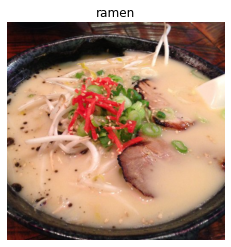

In [72]:
# Visualize
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the Data

In [73]:
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a Model

In [74]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## Fit the Model

In [75]:
history_7 = model_7.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 205ms/step - loss: 2.1827 - accuracy: 0.1981 - val_loss: 2.0405 - val_accuracy: 0.2664
Epoch 2/5
235/235 [==============================] - 46s 195ms/step - loss: 1.9214 - accuracy: 0.3295 - val_loss: 1.9786 - val_accuracy: 0.2964
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.4738 - accuracy: 0.5135 - val_loss: 2.0847 - val_accuracy: 0.3032
Epoch 4/5
235/235 [==============================] - 45s 192ms/step - loss: 0.7580 - accuracy: 0.7547 - val_loss: 2.7922 - val_accuracy: 0.2872
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.2489 - accuracy: 0.9277 - val_loss: 4.0824 - val_accuracy: 0.2584


## Evaluate the Model

In [76]:
model_7.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 4.0824 - accuracy: 0.2584


[4.082444667816162, 0.25839999318122864]

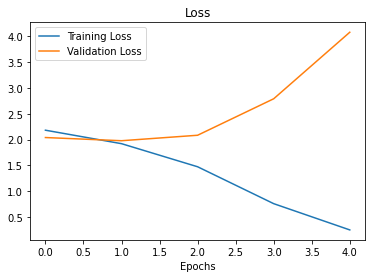

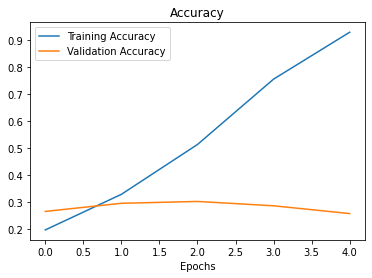

In [77]:
# Check out the model's loss curves
plot_loss_curves(history_7)

## Adjust the Model Hyperparameters

In [78]:
# Simplifying the Model
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [80]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.1172 - accuracy: 0.2465 - val_loss: 1.9405 - val_accuracy: 0.3188
Epoch 2/5
235/235 [==============================] - 52s 220ms/step - loss: 1.8249 - accuracy: 0.3744 - val_loss: 1.8722 - val_accuracy: 0.3576
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.5468 - accuracy: 0.4819 - val_loss: 1.8566 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 1.1742 - accuracy: 0.6220 - val_loss: 2.0832 - val_accuracy: 0.3328
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.7632 - accuracy: 0.7677 - val_loss: 2.3574 - val_accuracy: 0.3244


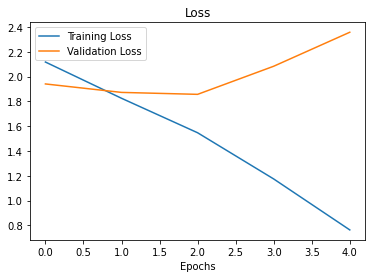

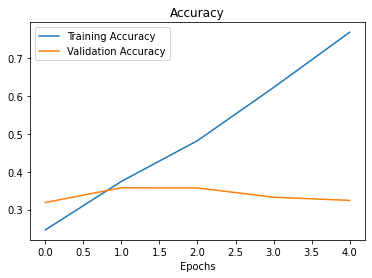

In [82]:
# Check the loss curves
plot_loss_curves(history_8)

## Trying to Reduce Overfitting with Data Augmentation

In [84]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [85]:
# Create a model (cloning)
model_9 = tf.keras.models.clone_model(model_7)

# Compile the cloned model
model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [86]:
# Fit the model
history_9 = model_9.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 482ms/step - loss: 2.2996 - accuracy: 0.1132 - val_loss: 2.2543 - val_accuracy: 0.1560
Epoch 2/5
235/235 [==============================] - 116s 493ms/step - loss: 2.2688 - accuracy: 0.1512 - val_loss: 2.2141 - val_accuracy: 0.2096
Epoch 3/5
235/235 [==============================] - 110s 469ms/step - loss: 2.2193 - accuracy: 0.1905 - val_loss: 2.1672 - val_accuracy: 0.2060
Epoch 4/5
235/235 [==============================] - 126s 534ms/step - loss: 2.1746 - accuracy: 0.2139 - val_loss: 2.1451 - val_accuracy: 0.2164
Epoch 5/5
235/235 [==============================] - 109s 464ms/step - loss: 2.1538 - accuracy: 0.2201 - val_loss: 2.0322 - val_accuracy: 0.2760


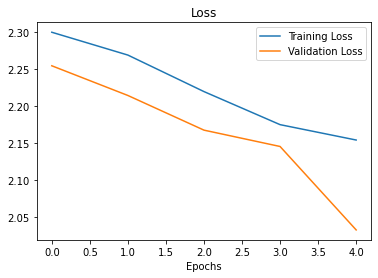

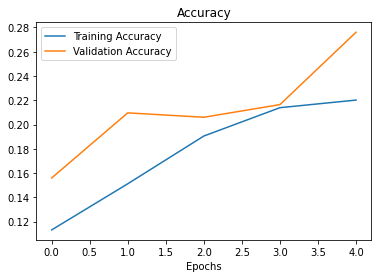

In [87]:
# Check the model
plot_loss_curves(history_9)

- Restructuring the model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation
- Training for longer

## Making Predictions with the Model

In [88]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-01-19 04:18:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2023-01-19 04:18:59 (82.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-01-19 04:18:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [89]:
# Reconfigure pred_and_plot to work with multiclass images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add logic for multiclass and get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 219ms/step


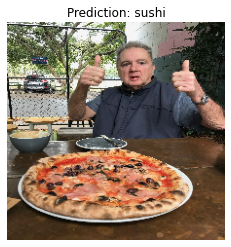

In [90]:
pred_and_plot(model=model_9,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 91ms/step


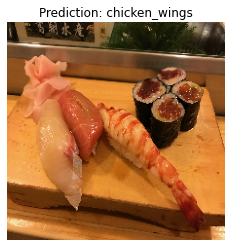

In [91]:
pred_and_plot(model=model_9,
              filename='03-sushi.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 23ms/step


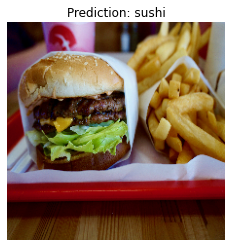

In [92]:
pred_and_plot(model=model_9,
              filename='03-hamburger.jpeg',
              class_names=class_names)